# 1. Introduction

## 1.1 Overview
### Problem statement:
  The problem of providing clean water to the population of over 57,000,000 in Tanzania is a major concern, as many existing water points in the country are in need of repair or have failed altogether. To address this issue, a classifier will be built to predict the condition of a water well based on information such as the type of pump, date of installation and others. The target audience for this classifier could be an NGO focused on repairing wells or the Government of Tanzania looking to improve the construction of new wells.

## 1.2 Business Understanding
The objective of building this classifier is to assist the NGO or the Government of Tanzania in their efforts to provide clean water to the population. By predicting the condition of a water well, the NGO can prioritize their resources and focus on the wells that are in need of repair, while the Government of Tanzania can use the insights to make informed decisions about the construction of new wells. The classifier will provide a reliable and efficient solution to the problem of ensuring clean water in Tanzania, which is essential for the health and well-being of its population.

## 1.3 Data Understanding 
The data used in this analysis was obtained from <a href="https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/">DrivenData</a> and was sourced from <a href="https://taarifa.org/">Taarifa</a> and the  <a href="https://www.maji.go.tz/">Tanzanian Ministry of Water</a> . It contains information on water wells in Tanzania and is divided into three files, including training set values, training set labels, and test set values. The training data has 59,400 observations and 41 variables, providing extensive information on various aspects of the water pumps:

- amount_tsh - Total static head (amount water available to waterpoint)
- date_recorded - The date the row was entered
- funder - Who funded the well
- gps_height - Altitude of the well
- installer - Organization that installed the well
- longitude - GPS coordinate
- latitude - GPS coordinate
- wpt_name - Name of the waterpoint if there is one
- num_private -
- basin - Geographic water basin
- subvillage - Geographic location
- region - Geographic location
- region_code - Geographic location (coded)
- district_code - Geographic location (coded)
- lga - Geographic location
- ward - Geographic location
- population - Population around the well
- public_meeting - True/False
- recorded_by - Group entering this row of data
- scheme_management - Who operates the waterpoint
- scheme_name - Who operates the waterpoint
- permit - If the waterpoint is permitted
- construction_year - Year the waterpoint was constructed
- extraction_type - The kind of extraction the waterpoint uses
- extraction_type_group - The kind of extraction the waterpoint uses
- extraction_type_class - The kind of extraction the waterpoint uses
- management - How the waterpoint is managed
- management_group - How the waterpoint is managed
- payment - What the water costs
- payment_type - What the water costs
- water_quality - The quality of the water
- quality_group - The quality of the water
- quantity - The quantity of water
- quantity_group - The quantity of water
- source - The source of the water
- source_type - The source of the water
- source_class - The source of the water
- waterpoint_type - The kind of waterpoint
- waterpoint_type_group - The kind of waterpoint

### Pump Conditions
- Functional
- Non- functional
- Repairs

# 2. Reading the Data

In [ ]:
from yellowbrick.classifier import ROCAUC, ClassificationReport, ClassPredictionError
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.target import ClassBalance

In [ ]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score, recall_score, f1_score, precision_score,\
    classification_report, roc_auc_score

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as Pipe

In [ ]:
from xgboost import XGBClassifier


In [168]:
 # Loading the required libraries    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer

In [169]:
# Loading the datasets 
data = pd.read_csv('Data/Training_set_values.csv')
data_labels = pd.read_csv('Data/Training_set_labels.csv')

# 3.Checking the Dataset

In [170]:
# Determining the number of records in our datasets 

print('Shape of data:', data.shape)
print('Shape of data_labels:', data_labels.shape)

Shape of data: (59400, 40)
Shape of data_labels: (59400, 2)


 As we determined the number of rows and columns in each of the datasets we see that **data** has 59400 rows and 40 columns and **data_labels** has 54900 rows and 2 columns

In [171]:
# Previewing the top 5 of the data dataset
data.head()


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [172]:
# Previewing the top 5 of the data_labels dataset 
data_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [173]:
# merge the data to form one dataframe

df = data.join(data_labels.set_index('id'), on='id')
pd.set_option('display.max_columns', None)

In [174]:
# previewing the merged dataframe
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [175]:
# previewng the shape of new data frame
df.shape

(59400, 41)

As we created a new dataframe by merging the datasets we see that it has **59400 rows** and **41 columns**

In [176]:
# Checking the statistics of the numerical columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,59400.0,37115.131768,21453.128371,0.00000,18519.750000,37061.500000,55656.500000,7.424700e+04
amount_tsh,59400.0,317.650385,2997.574558,0.00000,0.000000,0.000000,20.000000,3.500000e+05
gps_height,59400.0,668.297239,693.116350,-90.00000,0.000000,369.000000,1319.250000,2.770000e+03
longitude,59400.0,34.077427,6.567432,0.00000,33.090347,34.908743,37.178387,4.034519e+01
latitude,59400.0,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-2.000000e-08
num_private,59400.0,0.474141,12.236230,0.00000,0.000000,0.000000,0.000000,1.776000e+03
region_code,59400.0,15.297003,17.587406,1.00000,5.000000,12.000000,17.000000,9.900000e+01
district_code,59400.0,5.629747,9.633649,0.00000,2.000000,3.000000,5.000000,8.000000e+01
population,59400.0,179.909983,471.482176,0.00000,0.000000,25.000000,215.000000,3.050000e+04
construction_year,59400.0,1300.652475,951.620547,0.00000,0.000000,1986.000000,2004.000000,2.013000e+03


In [177]:
# checking whether each column has an appropriate data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

We can note in this dataset we can detect that we have **missing values** in which we will do data cleaning 

In [178]:
# checking for column names
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [179]:
# checking for duplicated columns
df.duplicated().any()

False

# 4. Data Cleaning

- Before we move forward with building a classifier, it's important to understand the distributions and properties of the features in our dataset. This can help us identify any potential issues such as fillers, outliers, or incorrect values that may impact the performance of our model.

- One important step is to inspect the value types of our columns and make sure that they are in the correct format. For example, if a column is meant to represent a date, we want to make sure that it's stored as a date type and not as a string or integer. This will allow us to perform meaningful operations on the data and extract information such as the difference between two dates.

- Another important step is to check for the presence of any fillers or placeholder values in our columns. For instance, it's common to see the value 0 used as a filler when the actual value is unknown or missing. These fillers can negatively impact the performance of our model and should be handled appropriately. We could either remove them, impute them with a more appropriate value, or treat them as a separate category.

- In addition to this, it's also a good idea to inspect the range of values for each column and check for any outliers that might be present. Outliers can have a significant impact on the performance of some models, so it's important to detect and handle them appropriately. This could involve removing them, transforming the data, or treating them as a separate category.

- To summarize, inspecting the value types, ranges, and distributions of our columns is an important step in preparing our data for modeling. By understanding these properties, we can identify and handle any potential issues that may impact the performance of our classifier.

In [180]:
# checking for null values in the the dataset
 
df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

- We can view in this data frame we have missing values that need to be cleaned

## 4.1 Uniformity


- The next step is to check the consistency of the data and make sure that the data types of each column are appropriate and correctly assigned. This examination will help to prevent any potential errors or inaccuracies in our analysis.

## 4.1.1 Management vs Scheme_management

In [181]:
# checking whether "scheme_management" and "management" columns seem to have similar entries

#Compare 'scheme_management' and 'management' column entries
df.scheme_management = df.scheme_management.str.lower() 
print('Both entries are the same: ', df.loc[df.scheme_management == df.management].shape[0])
print('Both entries differ total: ', df.loc[df.scheme_management != df.management].shape[0])
print('Both entries differ (Only non-null): ', df.loc[(df.scheme_management != df.management) &
                                              (df.scheme_management.isna() == False)].shape[0])
print('Difference because of null value: ', df.scheme_management.isna().sum())

Both entries are the same:  49336
Both entries differ total:  10064
Both entries differ (Only non-null):  6187
Difference because of null value:  3877


In [182]:
print('Management: \n', df.management.value_counts(), '\n\n')
print('scheme_management: \n', df.scheme_management.value_counts())

Management: 
 vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64 


scheme_management: 
 vwc                 36793
wug                  5206
water authority      3153
wua                  2883
water board          2748
parastatal           1680
private operator     1063
company              1061
other                 766
swc                    97
trust                  72
none                    1
Name: scheme_management, dtype: int64


We can see that the "Management"  and the "Scheme Management" columns are **similar**

In [183]:
# replacing the null values in scheme management with the equivalent in management
indexmodlist = list(df.loc[df.scheme_management.isna() == True].index) 
for index in indexmodlist:
    df.loc[index, 'scheme_management'] = df.loc[index, 'management'] 
    
print(df.scheme_management.isna().sum())
df.head()    

0


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,vwc,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,vwc,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,vwc,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,other,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


## 4.1.2 Source vs Source_type

In [184]:
# Checking for unique values
df['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [185]:
# Checking for unique values
df['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

The borehole listings in the **source** have been separated into two categories based on the type of motor system used: machine dbh and hand dtw. Additionally, water pumps have been separated based on their source (lakes/rivers vs other/unknown sources). As these divisions are similar, the category **source_type** can be maintained.

In [186]:
# checking for unique values
df['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

It's important to note that the **source_class** column in the source divides water sources based on the origin of the water. This column will be kept.

## 4.1.3 Waterpoint_type vs Waterpoint_type_group

In [187]:
# checking for unique values
df['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [188]:
# checking for unique values
df['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

It's worth mentioning that the **waterpoint_type** and **waterpoint_type_group** columns in the source are similar, with the exception of an additional category in "waterpoint_type" called **Communal Standpipe Multiple**. Since this category is a variation of the "Communal Standpipe" category, the "waterpoint_type_group" column can be removed.

## 4.1.4 Quantity vs Quantity_group

In [189]:
# Check for unique values
df['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [190]:
# check for unique values
df['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

These columns have the same records, so one can be dropped. **quantity_group** can be dropped

## 4.1.5 Payment vs Payment_type

In [191]:
# Check for unique values
df['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [192]:
# Check for unique values
df['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

This columns have the same entries, so one can be dropped. **payment_type** can be dropped.

## 4.1.6 Extraction_type vs Extraction_type_group vs Extraction_type_class

In [193]:
# Check for unique values
df['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [194]:
# Check for unique values
df['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [195]:
# Check for unique values
df['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

The source has three columns, **extraction_type**, **extraction_type_group**, and **extraction_type_class**, with similar entries. To simplify the data, two of these columns can be dropped. As **extraction_type_class** has better generalized the different types among the three columns, it will be kept.

In [196]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,vwc,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,vwc,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,vwc,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,other,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


## 4.2 Column drops, date conversion and Filling missing values

In [197]:
# Drop the irrelevant columns
df = df.drop(['funder', 'subvillage', 'scheme_management', 'scheme_name'], axis=1)


In [198]:
# Drop the redundant columns that are unnecessary
drop_cols = ['quantity_group', 'quality_group', 'source_type', 'waterpoint_type_group', 'payment', \
             'extraction_type', 'extraction_type_group', 'recorded_by', 'region', 'amount_tsh', \
             'wpt_name', 'lga', 'ward', 'num_private', 'management_group', 'id']

df = df.drop(drop_cols, axis=1)

In [199]:
# Fill the null values with mean or filler value
df = df.fillna(value={'permit': False, 'public_meeting': True, 'installer': 'N/A'})

In [200]:
df.head()

,date_recorded,gps_height,installer,longitude,latitude,basin,region_code,district_code,population,public_meeting,permit,construction_year,extraction_type_class,management,payment_type,water_quality,quantity,source,source_class,waterpoint_type,status_group
0,2011-03-14,1390,Roman,34.938093,-9.856322,Lake Nyasa,11,5,109,True,False,1999,gravity,vwc,annually,soft,enough,spring,groundwater,communal standpipe,functional
1,2013-03-06,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,20,2,280,True,True,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,functional
2,2013-02-25,686,World vision,37.460664,-3.821329,Pangani,21,4,250,True,True,2009,gravity,vwc,per bucket,soft,enough,dam,surface,communal standpipe multiple,functional
3,2013-01-28,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,90,63,58,True,True,1986,submersible,vwc,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple,non functional
4,2011-07-13,0,Artisan,31.130847,-1.825359,Lake Victoria,18,1,0,True,True,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,functional


In [201]:
# # convert all 0 to NaN and then convert other years into 'ages' and then fill NaN in with average age
df.construction_year = df.construction_year.replace(0, np.NaN)

df['age'] = 2013 - df.construction_year
df.age.fillna(df.age.mean(), inplace=True)
df.age = df.age.round().astype(int)

df.drop('construction_year', axis=1, inplace=True)

In [202]:
df.head()

,date_recorded,gps_height,installer,longitude,latitude,basin,region_code,district_code,population,public_meeting,permit,extraction_type_class,management,payment_type,water_quality,quantity,source,source_class,waterpoint_type,status_group,age
0,2011-03-14,1390,Roman,34.938093,-9.856322,Lake Nyasa,11,5,109,True,False,gravity,vwc,annually,soft,enough,spring,groundwater,communal standpipe,functional,14
1,2013-03-06,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,20,2,280,True,True,gravity,wug,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,functional,3
2,2013-02-25,686,World vision,37.460664,-3.821329,Pangani,21,4,250,True,True,gravity,vwc,per bucket,soft,enough,dam,surface,communal standpipe multiple,functional,4
3,2013-01-28,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,90,63,58,True,True,submersible,vwc,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple,non functional,27
4,2011-07-13,0,Artisan,31.130847,-1.825359,Lake Victoria,18,1,0,True,True,gravity,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,functional,16


In [203]:
# assign any gps_height values of 0 to the height mean
gps_mean = df[df['gps_height'] > 0]['gps_height'].mean()
df['gps_height'] = np.where(df['gps_height'] == 0, gps_mean, df['gps_height'])

In [204]:
# assign any population values of 0 to the population mean
pop_mean = df[df['population'] > 0]['population'].mean()
df['population'] = np.where(df['population'] == 0, pop_mean, df['population'])

In [205]:
# change permit and permit meeting from booleans into int
df['public_meeting'] = df['public_meeting'].astype(int)
df['permit'] = df['permit'].astype(int)

In [206]:
# convert to string region_code and district_code
df['region_code'] = df['region_code'].astype(str)
df['district_code'] = df['district_code'].astype(str)

In [207]:
# convert int32 to int64 
df['public_meeting'] = df['public_meeting'].astype('int64')
df['permit'] = df['permit'].astype('int64')
df['age'] = df['age'].astype('int64')

In [208]:
#convert status_group to functional=2, repairs = 1, and non functional = 0
status = {'functional': 2, 'functional needs repair': 1, 'non functional': 0}

df['target'] = df['status_group'].map(status)
df = df.drop('status_group', axis=1)

In [209]:
#Convert date into date time and then take only year to signify age of pump record
df['date_recorded'] = pd.to_datetime(df['date_recorded'])

In [210]:
# dropping the age_record column due to irrelevance
df['age_record'] = 2013 - df['date_recorded'].dt.year
df = df.drop('date_recorded', axis=1)

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gps_height             59400 non-null  float64
 1   installer              59400 non-null  object 
 2   longitude              59400 non-null  float64
 3   latitude               59400 non-null  float64
 4   basin                  59400 non-null  object 
 5   region_code            59400 non-null  object 
 6   district_code          59400 non-null  object 
 7   population             59400 non-null  float64
 8   public_meeting         59400 non-null  int64  
 9   permit                 59400 non-null  int64  
 10  extraction_type_class  59400 non-null  object 
 11  management             59400 non-null  object 
 12  payment_type           59400 non-null  object 
 13  water_quality          59400 non-null  object 
 14  quantity               59400 non-null  object 
 15  so

# 5 Predictive Modelling using Linear Regression

In [212]:
df.describe()

,gps_height,longitude,latitude,population,public_meeting,permit,age,target,age_record
count,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,1033.133363,34.077427,-5.706033e+00,281.087167,0.914899,0.654074,16.120707,1.158838,1.078333
std,496.501747,6.567432,2.946019e+00,451.765813,0.279034,0.475673,10.066168,0.949794,0.958758
min,-90.000000,0.000000,-1.164944e+01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,903.000000,33.090347,-8.540621e+00,100.000000,1.000000,0.000000,9.000000,0.000000,0.000000
50%,1060.341803,34.908743,-5.021597e+00,281.087167,1.000000,1.000000,16.000000,2.000000,1.000000
75%,1319.250000,37.178387,-3.326156e+00,281.087167,1.000000,1.000000,17.000000,2.000000,2.000000
max,2770.000000,40.345193,-2.000000e-08,30500.000000,1.000000,1.000000,53.000000,2.000000,11.000000


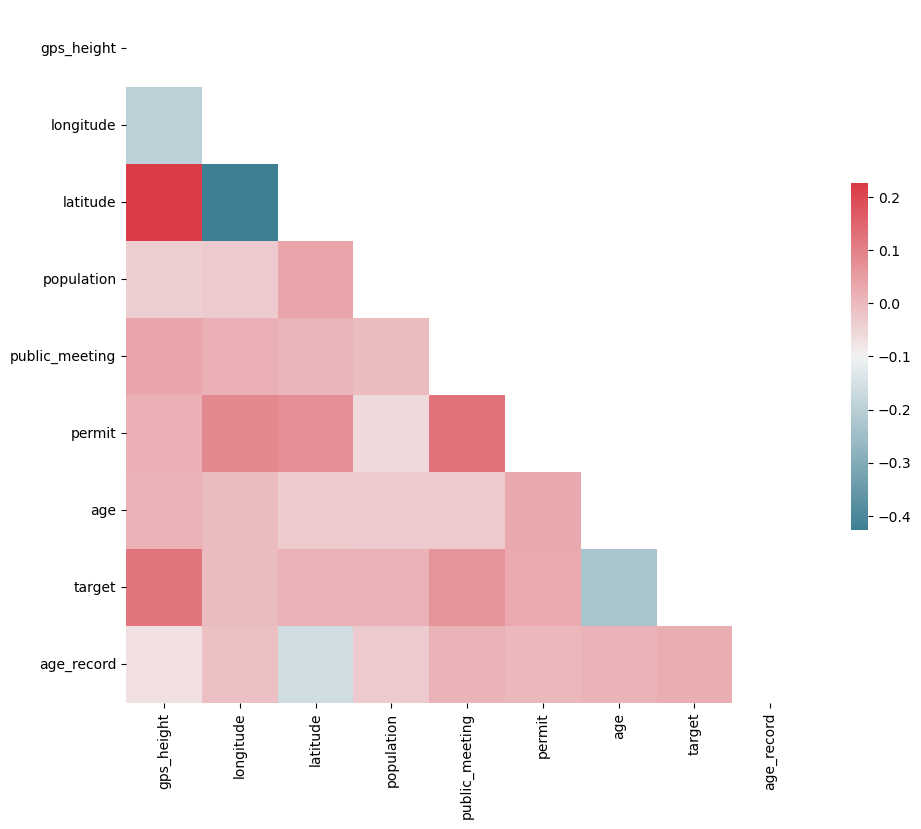

In [213]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap=cmap, cbar_kws={"shrink": .5});

- The correlation matrix provides a visual representation of the relationship between each feature and the target value before we proceed with implementing any classification models. This helps us understand the degree of association between the features and the target, allowing us to make informed decisions regarding which features to include in our models.

## 5.1 One Hot Encoding

### 5.1.1 Train Test Split

## Train

In [215]:
X = df.drop(['target'], axis=1)
y = df.target

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [217]:
X_train_cat = X_train.select_dtypes('object')

ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
dummy = ohe.fit_transform(X_train_cat)

column_names = []
for i in range(dummy.shape[1]):
    col_name = 'col_' + str(i)
    column_names.append(col_name)

dummy_df = pd.DataFrame(dummy, columns=column_names, index=X_train_cat.index)

In [218]:
X_train_nums = X_train.select_dtypes(include=['float64', 'int64'])

ss = StandardScaler()
scaled = ss.fit_transform(X_train_nums)

scaled_df = pd.DataFrame(scaled, index=X_train_nums.index)
scaled_df.columns = X_train_nums.columns

In [222]:
X_train_clean = pd.concat([scaled_df, dummy_df], axis=1)
X_train_clean

gps_height  longitude  latitude  population  public_meeting    permit  \
43069    1.635537   0.105481 -1.162696   -0.546617        0.307594  0.728339   
58858    0.059212  -0.549544  0.996545    0.005512        0.307594 -1.372988   
41707    1.623499   0.177969  0.849083   -0.336137        0.307594  0.728339   
30674    0.343432   0.668131  0.272582   -0.649519        0.307594  0.728339   
20944   -1.947848   0.794903 -0.448784    1.782697        0.307594 -1.372988   
...           ...        ...       ...         ...             ...       ...   
54343   -1.412146   0.346536 -1.041913   -0.055497        0.307594  0.728339   
38158    1.428880   0.064069 -1.380354   -0.570004        0.307594 -1.372988   
860     -2.094314   0.747756  0.099081    1.686812       -3.251043 -1.372988   
15795    0.059212   0.030994  0.886178    0.005512        0.307594  0.728339   
56422    0.519993   0.540319  0.850697   -0.649519        0.307594  0.728339   

            age  age_record  col_0  col_1  col_2  col_3  col_4  col_5  col_6  \
43069 -1.202387    0.963380    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
58858 -0.011677    0.963380    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
41707 -0.805483   -1.125659    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
30674  2.171292    0.963380    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
20944 -1.301613    0.963380    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...         ...         ...    ...    ...    ...    ...    ...    ...    ...   
54343  0.186775    0.963380    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
38158  0.881356    0.963380    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
860   -0.805483    0.963380    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
15795 -0.011677   -0.081140    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
56422  2.072066   -1.125659    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       col_7  col_8  col_9  col_10  col_11  col_12  col_13  col_14  col_15  \
43069    1.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0   
58858    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0   
41707    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0   
30674    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0   
20944    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...      ...    ...    ...     ...     ...     ...     ...     ...     ...   
54343    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0   
38158    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0   
860      0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0   
15795    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0   
56422    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       col_16  col_17  col_18  col_19  col_20  col_21  col_22  col_23  col_24  \
43069     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
58858     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
41707     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
30674     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
20944     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
54343     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
38158     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
860       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
15795     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
56422     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       col_25  col_26  col_27  col_28  col_29  col_30  col_31  col_32  col_33  \
43069     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
58858     0.0

## Test

In [223]:
X_test_cat = X_test.select_dtypes('object')

dummy = ohe.fit_transform(X_test_cat)

column_names = []
for i in range(dummy.shape[1]):
    col_name = 'col_' + str(i)
    column_names.append(col_name)

dummy_df = pd.DataFrame(dummy, columns=column_names, index=X_test_cat.index)

In [225]:
X_test_nums = X_test.select_dtypes(include=['float64', 'int64'])

ss = StandardScaler()
scaled = ss.fit_transform(X_test_nums)

scaled_df = pd.DataFrame(scaled, index=X_test_nums.index)
scaled_df.columns = X_test_nums.columns

In [226]:
X_test_clean = pd.concat([scaled_df, dummy_df], axis=1)
X_test_clean

gps_height  longitude  latitude  population  public_meeting    permit  \
2980     0.044381  -0.297961  0.707711   -0.010921        0.298846  0.724681   
5246     0.044381  -0.171984  0.252276   -0.010921        0.298846  0.724681   
22659    1.293785   0.222901  0.489653   -0.275181        0.298846  0.724681   
39888    0.044381  -0.126180 -1.137236   -0.010921       -3.346211 -1.379917   
13361    0.143287   0.033864  0.426000   -0.102432        0.298846  0.724681   
...           ...        ...       ...         ...             ...       ...   
13160    1.305981   0.279686  0.824034   -0.171928        0.298846  0.724681   
3852     0.044381  -0.111620  0.310203   -0.010921       -3.346211 -1.379917   
28598    2.023517   0.105487 -1.332789   -0.509483        0.298846  0.724681   
43736    0.537627  -0.587091  0.329370    0.721599        0.298846  0.724681   
41923    0.044381  -0.086230  0.929989   -0.010921        0.298846  0.724681   

            age  age_record  col_0  col_1  col_2  col_3  col_4  col_5  col_6  \
2980  -0.012729   -0.083014    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5246  -0.012729   -0.083014    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
22659 -1.108546   -1.122579    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
39888 -0.012729    0.956552    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
13361 -1.407405   -1.122579    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...         ...         ...    ...    ...    ...    ...    ...    ...    ...   
13160 -1.208165   -1.122579    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3852  -0.012729   -1.122579    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28598 -1.008926    0.956552    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
43736 -0.710067   -1.122579    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
41923 -0.012729    0.956552    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       col_7  col_8  col_9  col_10  col_11  col_12  col_13  col_14  col_15  \
2980     0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5246     0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0   
22659    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0   
39888    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0   
13361    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...      ...    ...    ...     ...     ...     ...     ...     ...     ...   
13160    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3852     0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0   
28598    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0   
43736    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0   
41923    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       col_16  col_17  col_18  col_19  col_20  col_21  col_22  col_23  col_24  \
2980      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5246      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
22659     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
39888     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
13361     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
13160     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3852      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
28598     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
43736     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
41923     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       col_25  col_26  col_27  col_28  col_29  col_30  col_31  col_32  col_33  \
2980      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5246      0.0

In [227]:
# The code below replaces square brackets, angle brackets
# and square brackets in the column names of X_train_clean and X_test_clean with underscores using the re library
import re
regex = re.compile(r"[\[\]<]")
X_train_clean.rename(columns=lambda x: re.sub(regex, "_", x), inplace=True)
X_test_clean.rename(columns=lambda x: re.sub(regex, "_", x), inplace=True)